<table align="left" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21618C" size=8px>
                  <b>Hotel Booking Cancellation
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' features various classification, regression and clustering algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 'Statsmodels' is used to explore data, estimate statistical models, and perform statistical tests

from sklearn.feature_selection import RFE
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.api import anova_lm


import matplotlib.pyplot as plt

In [2]:

# the path for reading the data file
# Note: Set your path accordingly
#os.chdir('/Users/Dippies/GL DSE Deliveries/Regression/Nov 22')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# returns an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format

## 2. Read Data

In [2]:
df = pd.read_csv('H1.csv')
df.head(10)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,03-07-2015
5,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,03-07-2015
6,0,0,2015,July,27,1,0,2,2,0,...,No Deposit,NULL,NULL,0,Transient,107.0,0,0,Check-Out,03-07-2015
7,0,9,2015,July,27,1,0,2,2,0,...,No Deposit,303,NULL,0,Transient,103.0,0,1,Check-Out,03-07-2015
8,1,85,2015,July,27,1,0,3,2,0,...,No Deposit,240,NULL,0,Transient,82.0,0,1,Canceled,06-05-2015
9,1,75,2015,July,27,1,0,3,2,0,...,No Deposit,15,NULL,0,Transient,105.5,0,0,Canceled,22-04-2015


In [3]:
df.shape

(40060, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 31 columns):
IsCanceled                     40060 non-null int64
LeadTime                       40060 non-null int64
ArrivalDateYear                40060 non-null int64
ArrivalDateMonth               40060 non-null object
ArrivalDateWeekNumber          40060 non-null int64
ArrivalDateDayOfMonth          40060 non-null int64
StaysInWeekendNights           40060 non-null int64
StaysInWeekNights              40060 non-null int64
Adults                         40060 non-null int64
Children                       40060 non-null int64
Babies                         40060 non-null int64
Meal                           40060 non-null object
Country                        39596 non-null object
MarketSegment                  40060 non-null object
DistributionChannel            40060 non-null object
IsRepeatedGuest                40060 non-null int64
PreviousCancellations          40060 non-null int64
Pr

In [242]:
# Checking for null values
df.isnull().sum()

IsCanceled                       0
LeadTime                         0
ArrivalDateYear                  0
ArrivalDateMonth                 0
ArrivalDateWeekNumber            0
ArrivalDateDayOfMonth            0
StaysInWeekendNights             0
StaysInWeekNights                0
Adults                           0
Children                         0
Babies                           0
Meal                             0
Country                        464
MarketSegment                    0
DistributionChannel              0
IsRepeatedGuest                  0
PreviousCancellations            0
PreviousBookingsNotCanceled      0
ReservedRoomType                 0
AssignedRoomType                 0
BookingChanges                   0
DepositType                      0
Agent                            0
Company                          0
DaysInWaitingList                0
CustomerType                     0
ADR                              0
RequiredCarParkingSpaces         0
TotalOfSpecialReques

# 3. EDA

In [243]:
categ_col = df.select_dtypes('object').columns.tolist()

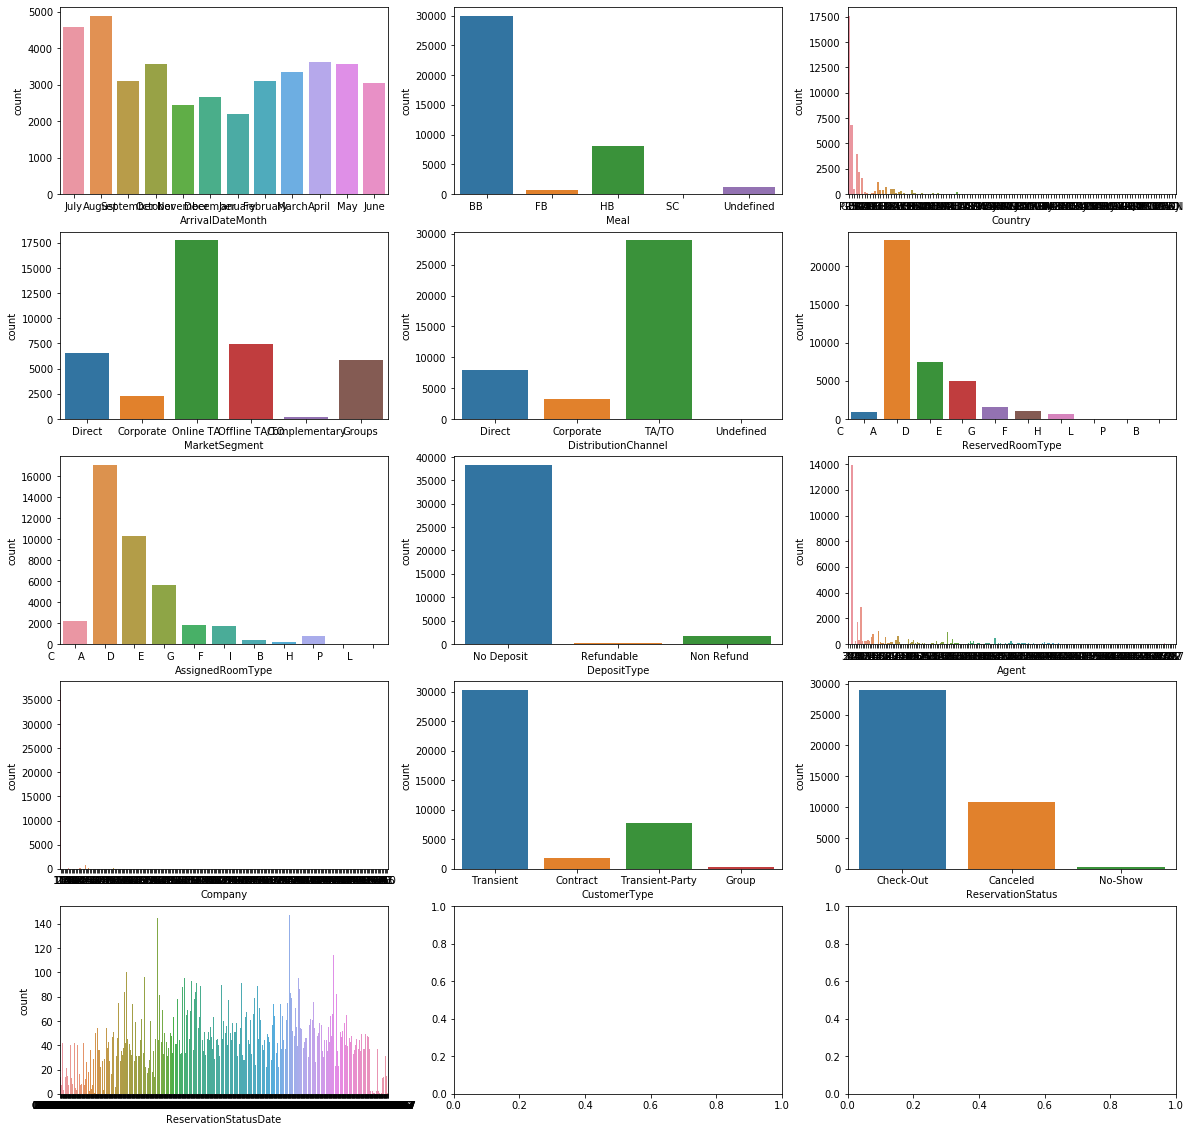

In [244]:
fig, ax = plt.subplots(5,3,figsize=(20,20))
for i, j in zip(categ_col,ax.flatten()):
    sns.countplot(df[i],ax=j)
plt.show()

In [9]:
df.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000
mean,0.277634,92.675686,2016.121443,27.140864,15.821243,1.189815,3.128732,1.867149,0.128682,0.013904,0.044383,0.101722,0.146455,0.287968,0.527758,94.952930,0.138068,0.619770
std,0.447837,97.285315,0.722347,14.005441,8.883708,1.147812,2.461329,0.697285,0.445195,0.118998,0.205948,1.335115,1.001955,0.726548,7.428580,61.442418,0.351001,0.813930
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,10.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000
50%,0.000000,57.000000,2016.000000,28.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000,0.000000
75%,1.000000,155.000000,2017.000000,38.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,185.000000,508.000000,8.000000,5.000000


In [10]:
df.describe(include='object')

,ArrivalDateMonth,Meal,Country,MarketSegment,DistributionChannel,ReservedRoomType,AssignedRoomType,DepositType,Agent,Company,CustomerType,ReservationStatus,ReservationStatusDate
count,40060,40060,39596,40060,40060,40060,40060,40060,40060,40060,40060,40060,40060
unique,12,5,125,6,4,10,11,3,186,236,4,3,913
top,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,240,NULL,Transient,Check-Out,19-01-2017
freq,4894,30005,17630,17729,28925,23399,17046,38199,13905,36952,30209,28938,147


In [245]:
numeric_col = df.select_dtypes(np.number).columns.tolist()

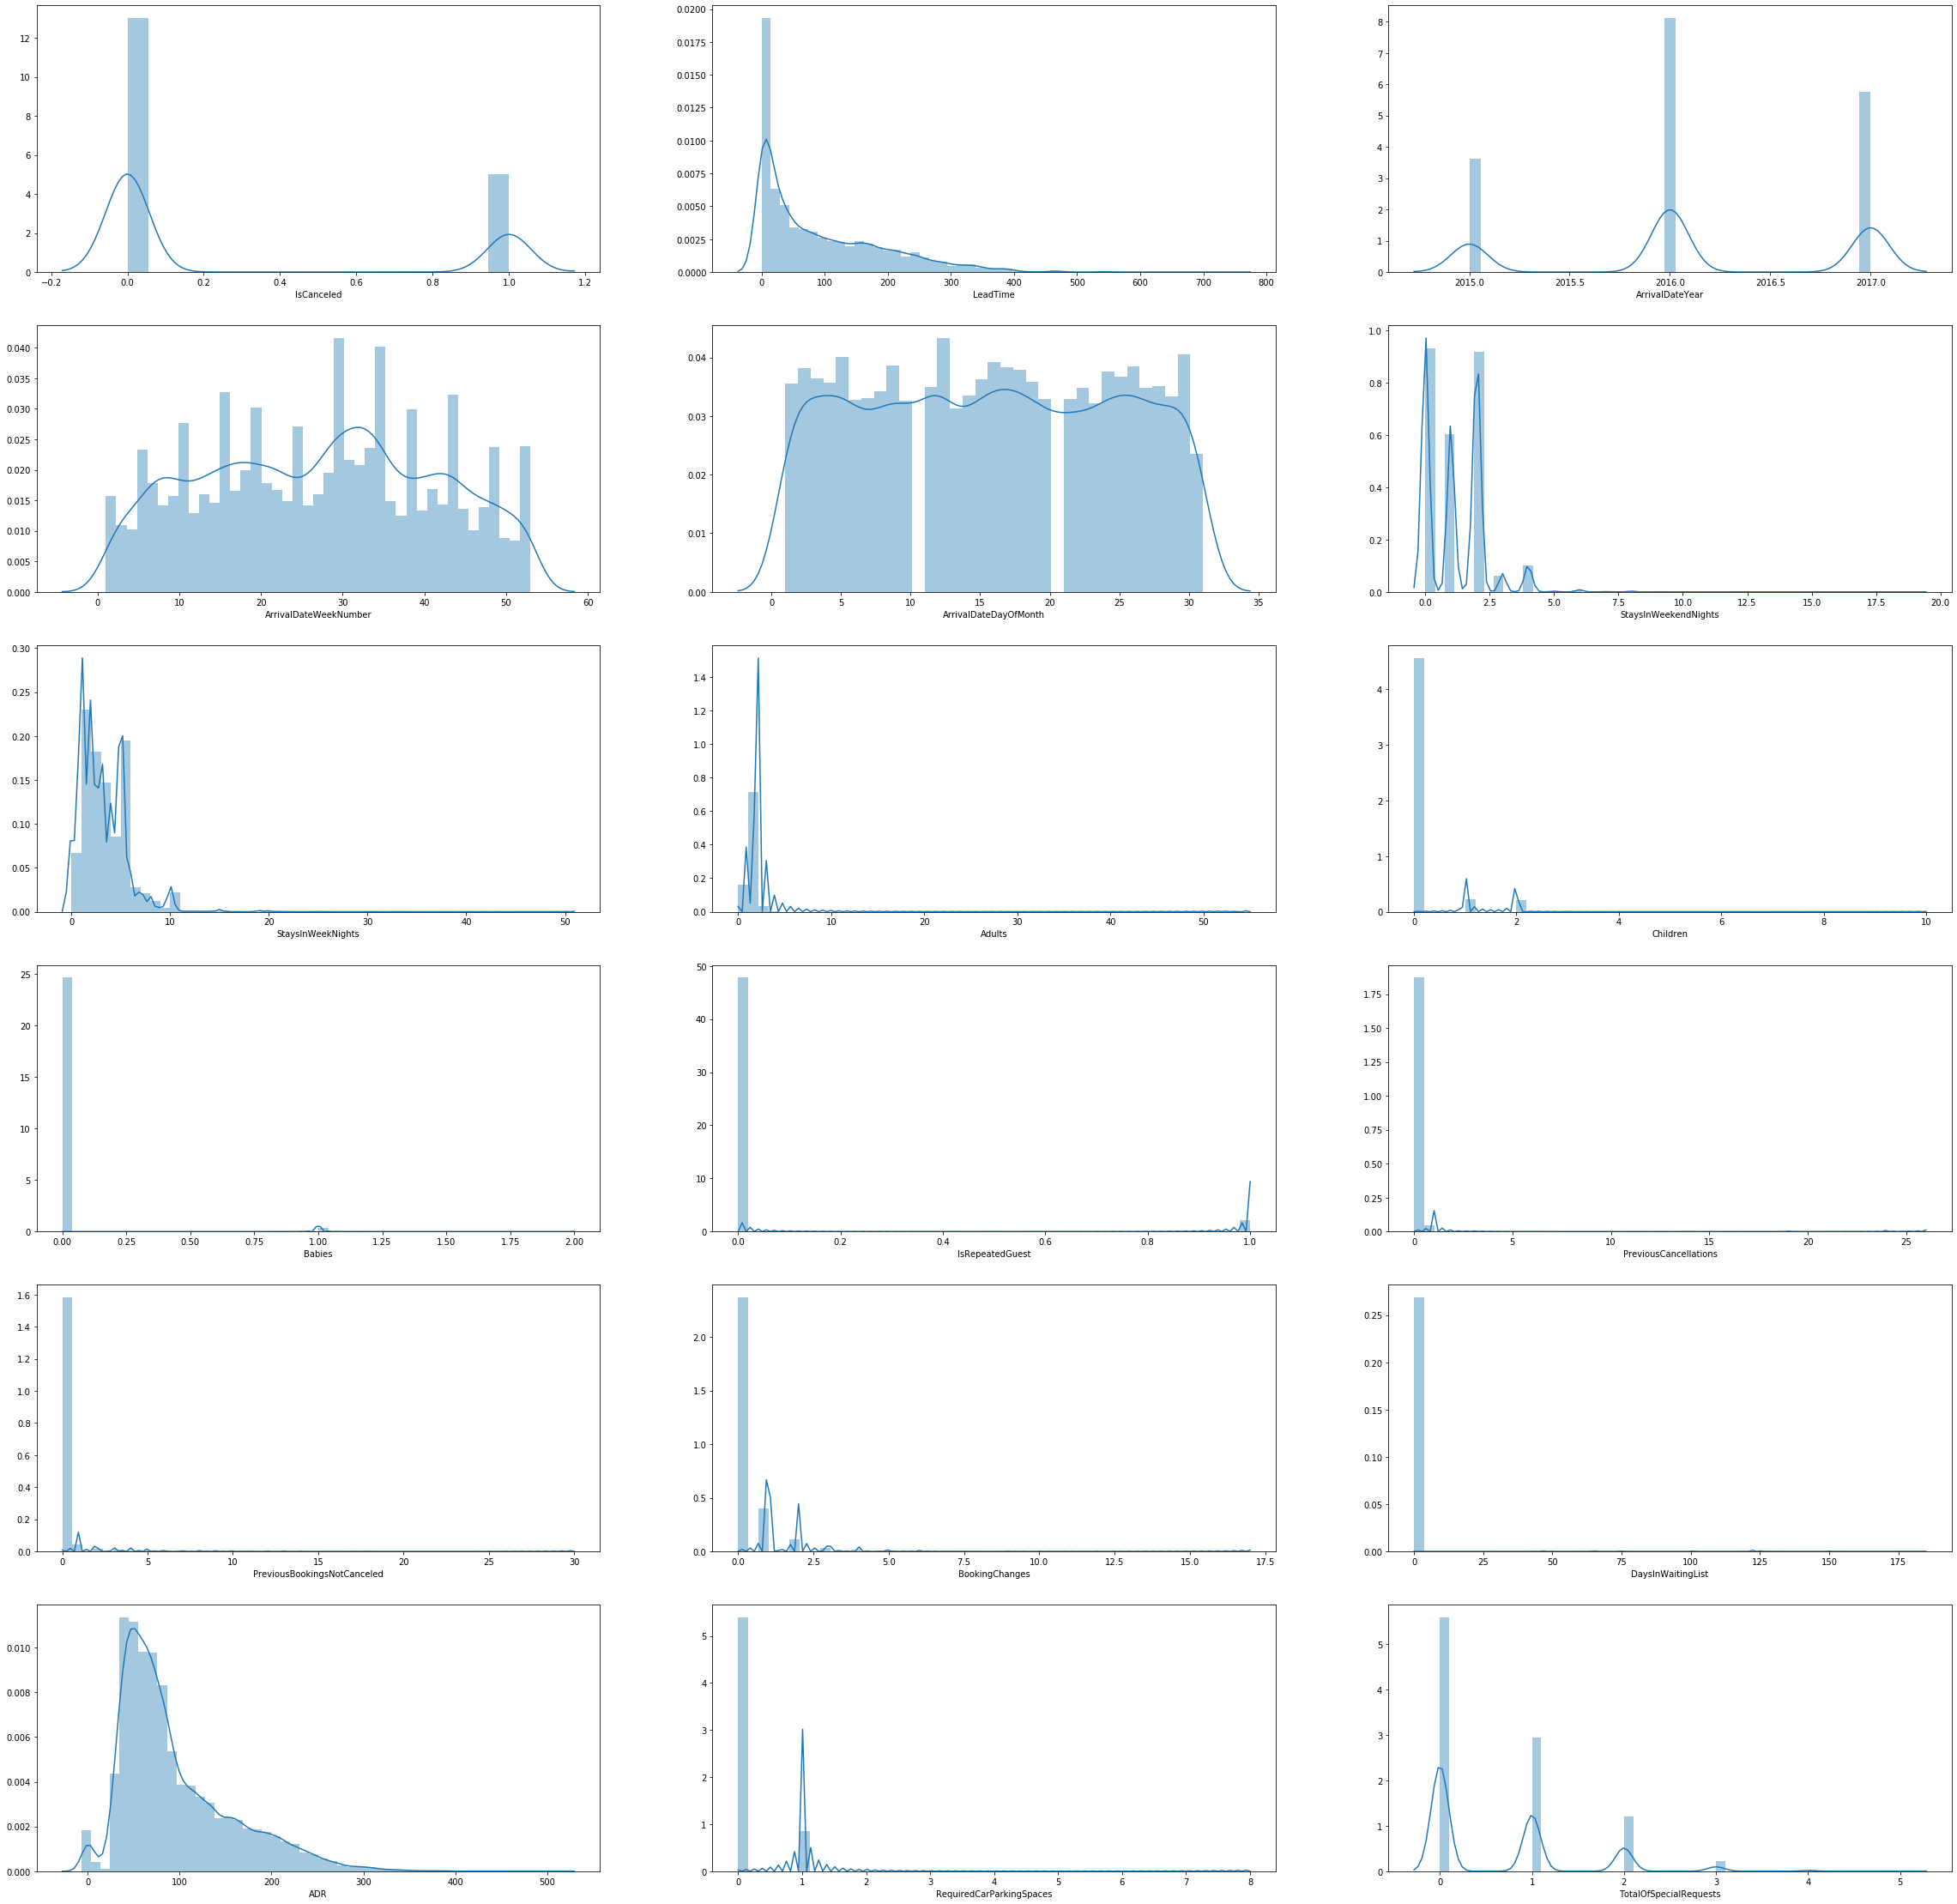

In [15]:
fig, ax = plt.subplots(6,3,figsize=(40,40))
for i, j in zip(numeric_col,ax.flatten()):
    sns.distplot(df[i],ax=j)
plt.show()

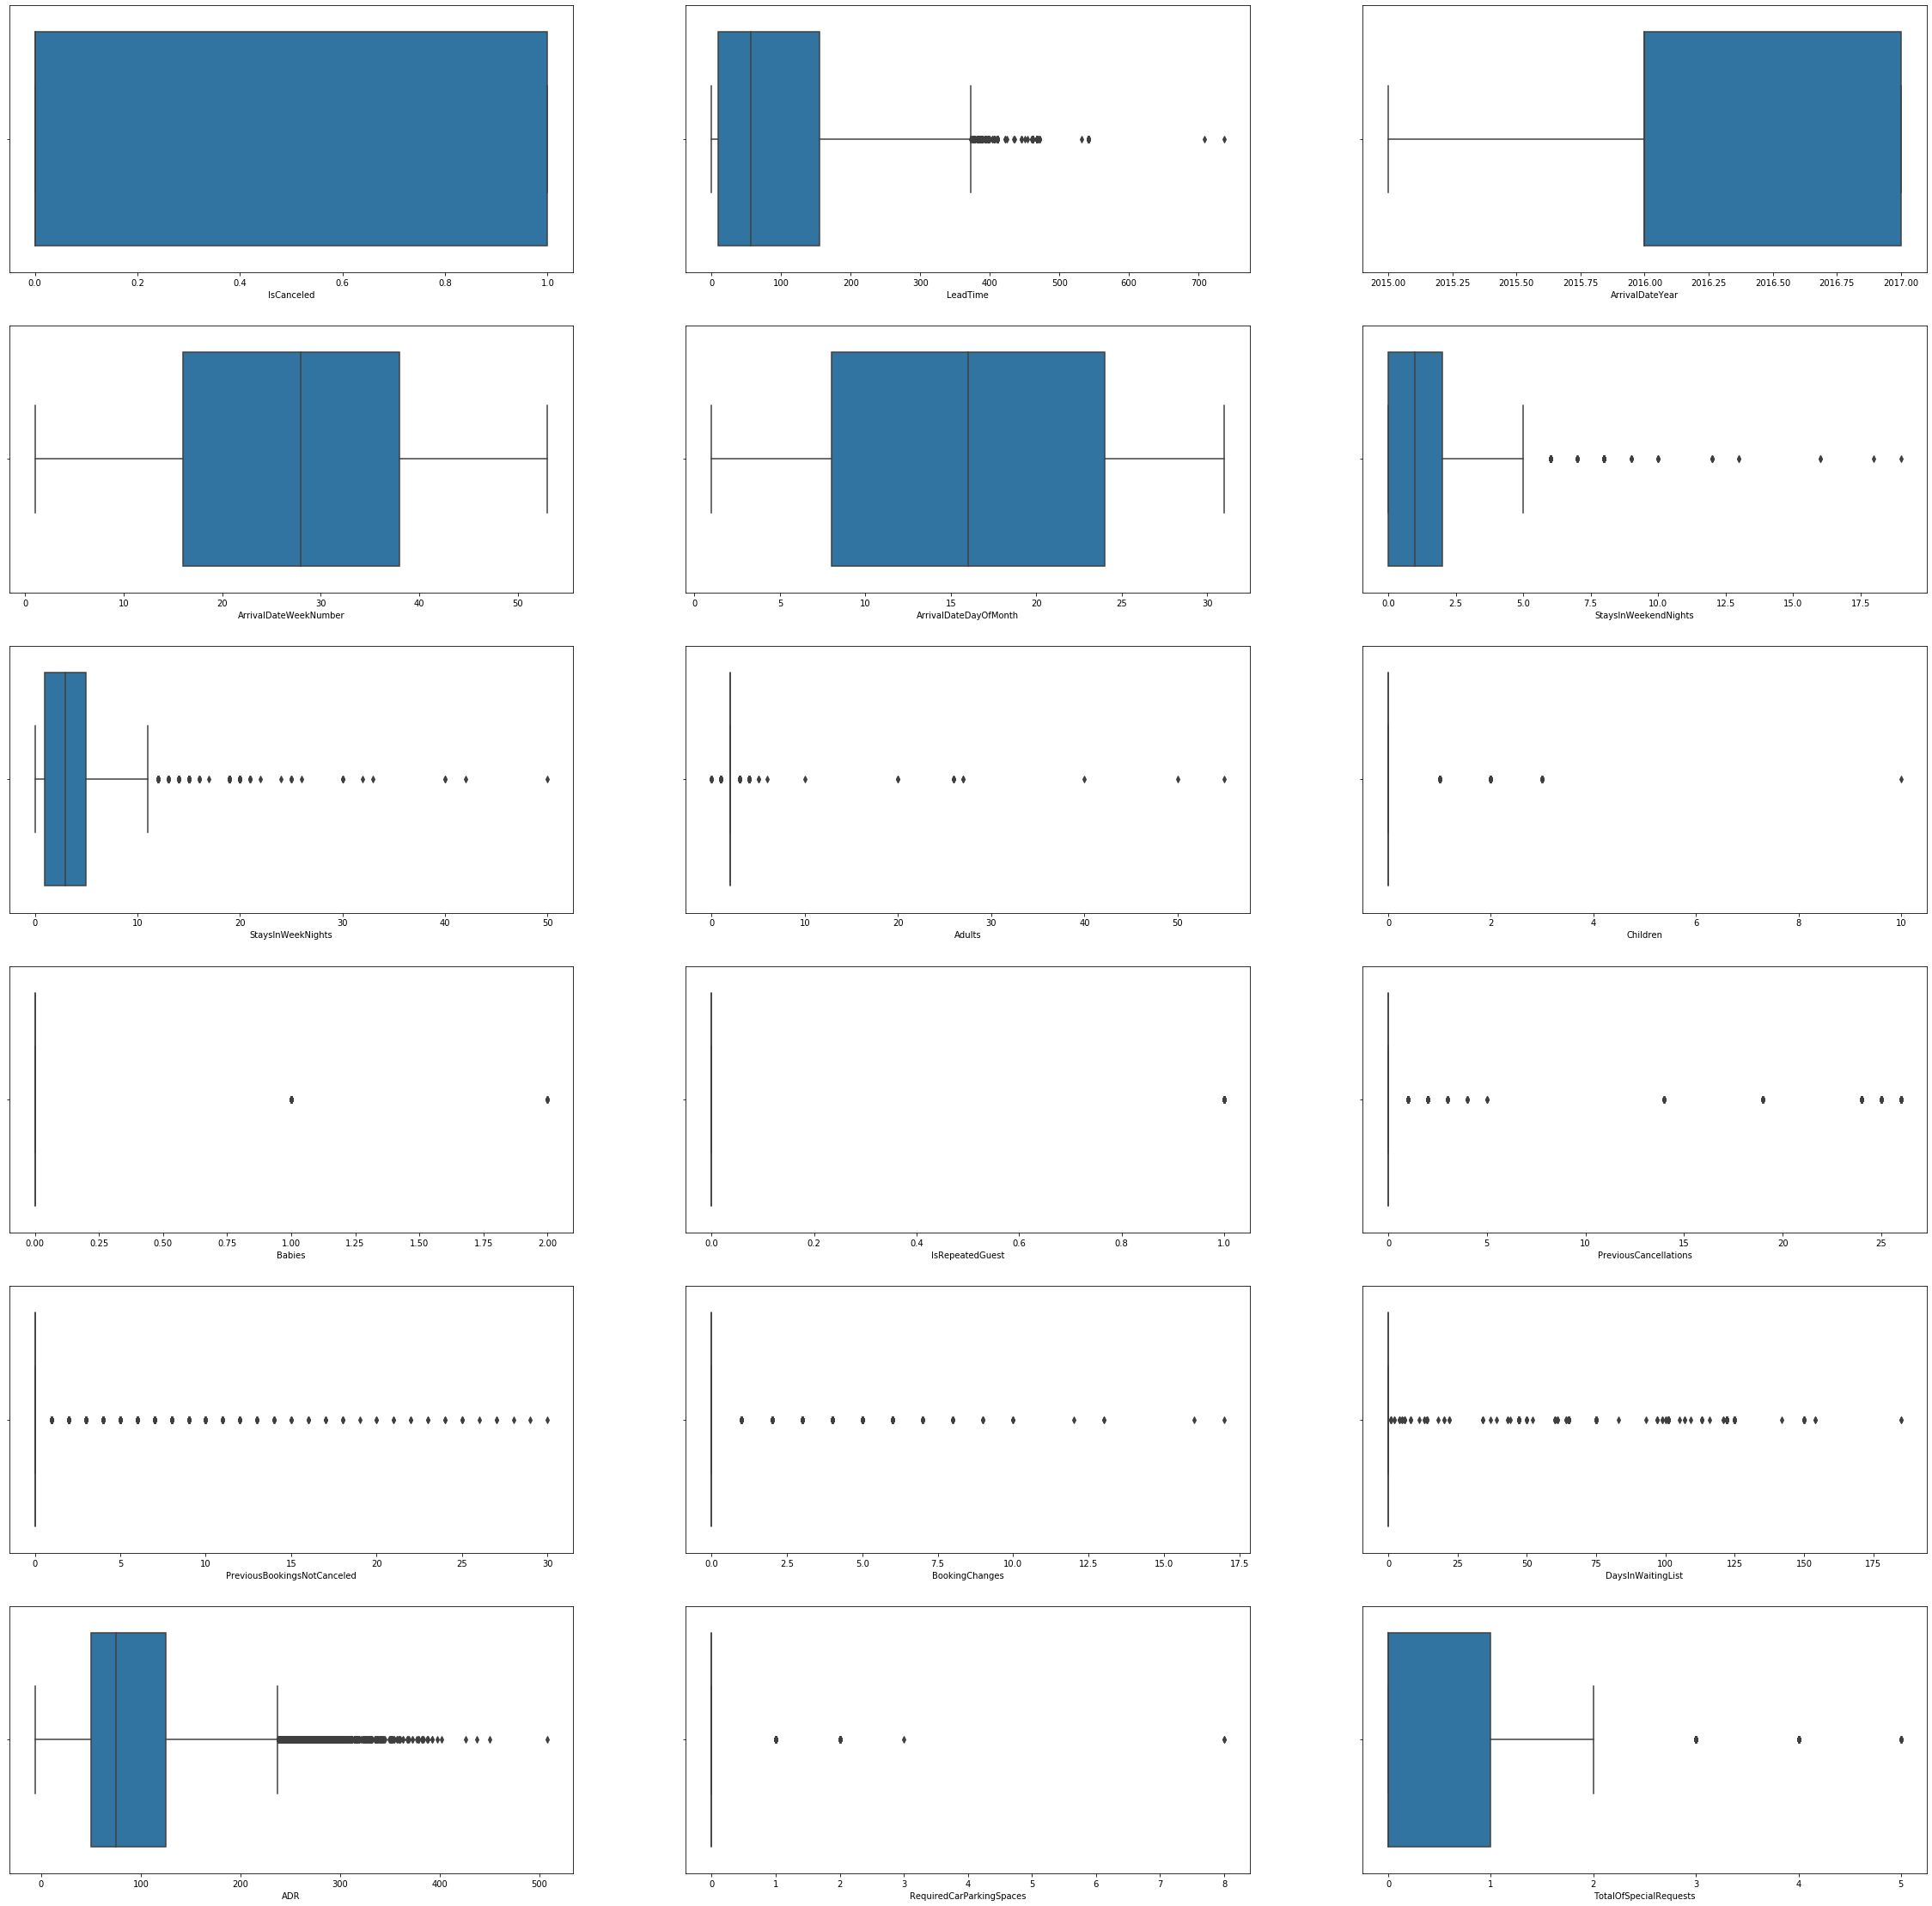

In [14]:
fig, ax = plt.subplots(6,3,figsize=(40,40))
for i, j in zip(numeric_col,ax.flatten()):
    sns.boxplot(df[i],ax=j)
plt.show()

### It can be seen that the data has many outliers

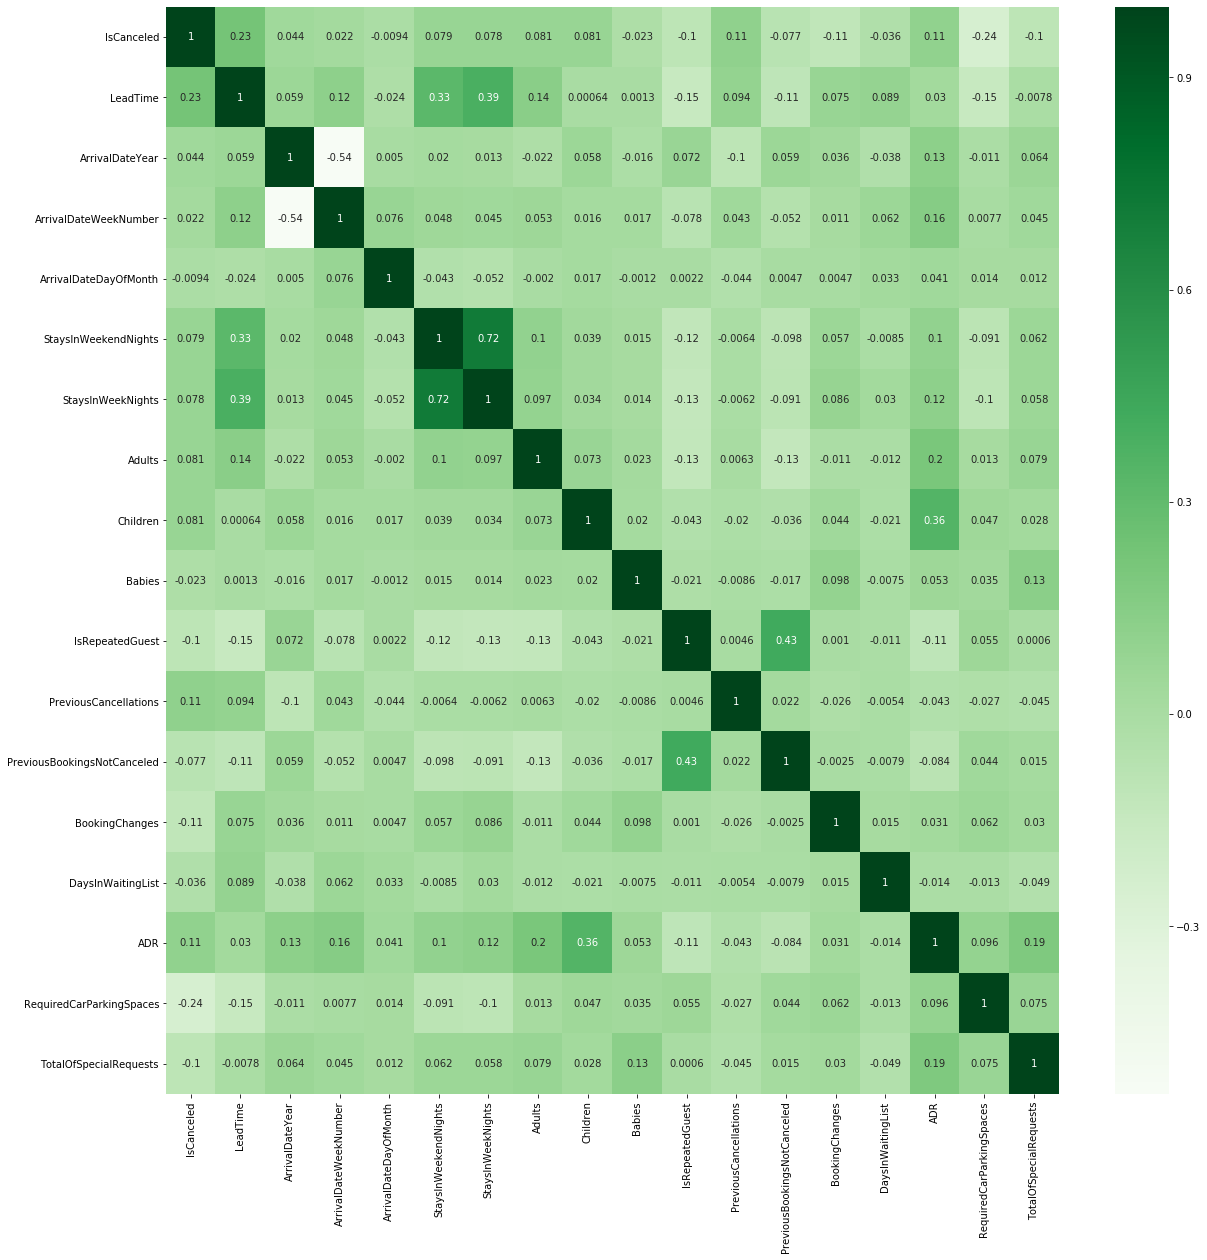

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

### Multicollinearity is observed between StayInWeekNights and StayInWeekendNights

In [7]:
# calculate the first quartile
Q1 = df.quantile(0.25)

#calculate the third quartile
Q3 = df.quantile(0.75)

# The Interquartile Range (IQR) is defined as difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1
print(IQR)

IsCanceled                      1.000000
LeadTime                      145.000000
ArrivalDateYear                 1.000000
ArrivalDateWeekNumber          22.000000
ArrivalDateDayOfMonth          16.000000
StaysInWeekendNights            2.000000
StaysInWeekNights               4.000000
Adults                          0.000000
Children                        0.000000
Babies                          0.000000
IsRepeatedGuest                 0.000000
PreviousCancellations           0.000000
PreviousBookingsNotCanceled     0.000000
BookingChanges                  0.000000
DaysInWaitingList               0.000000
ADR                            75.000000
RequiredCarParkingSpaces        0.000000
TotalOfSpecialRequests          1.000000
dtype: float64


In [8]:
df_outliers = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [9]:
# Looking at the number of outliers in the data
df_outliers.shape

(21740, 31)

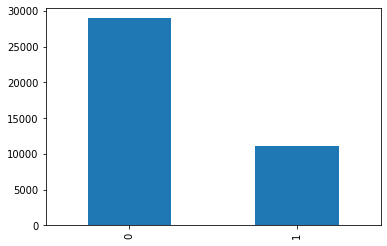

In [35]:
df.IsCanceled.value_counts().plot(kind='bar')

In [16]:
print('Percentage of class 0 (Not Canceled) :',df['IsCanceled'].value_counts()[0]*100/df.shape[0])
print('Percentage of class 1 (Canceled):',df['IsCanceled'].value_counts()[1]*100/df.shape[0])

Percentage of class 0 (Not Canceled) : 72.23664503245132
Percentage of class 1 (Canceled): 27.763354967548675


In [21]:
pd.crosstab(df['MarketSegment'],df['DistributionChannel'])

DistributionChannel,Corporate,Direct,TA/TO,Undefined
MarketSegment,,,,
Complementary,20,139,42,0
Corporate,2152,116,41,0
Direct,84,6228,200,1
Groups,988,1295,3553,0
Offline TA/TO,14,10,7448,0
Online TA,11,77,17641,0


In [22]:
pd.crosstab(df['IsRepeatedGuest'],df['PreviousCancellations'])

PreviousCancellations,0,1,2,3,4,5,14,19,24,25,26
IsRepeatedGuest,,,,,,,,,,,
0,37372,731,38,9,0,0,14,19,48,25,26
1,1593,165,6,5,6,3,0,0,0,0,0


In [23]:
pd.crosstab(df['IsRepeatedGuest'],df['PreviousBookingsNotCanceled'])

PreviousBookingsNotCanceled,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
IsRepeatedGuest,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,37673,246,119,70,45,39,21,11,12,8,6,5,4,3,3,1,1,1,2,0,1,1,1,1,1,2,0,2,1,1,1
1,355,727,269,134,82,52,35,26,21,16,14,9,8,7,5,3,3,2,2,1,1,1,1,1,1,1,1,0,0,0,0


In [24]:
pd.crosstab(df['ReservationStatus'],df['IsCanceled'])

IsCanceled,0,1
ReservationStatus,,
Canceled,0,10831
Check-Out,28938,0
No-Show,0,291


In [25]:
ct =pd.crosstab(df['CustomerType'],df['IsCanceled'])
ct.div(ct.sum(1), axis=0).sort_values(by=1,ascending=False)

IsCanceled,0,1
CustomerType,,
Transient,0.688305,0.311695
Transient-Party,0.805031,0.194969
Group,0.894366,0.105634
Contract,0.911599,0.088401


In [26]:
pd.crosstab(df['ReservedRoomType'],df['AssignedRoomType'])

AssignedRoomType,A,B,C,D,E,F,G,H,I,L,P
ReservedRoomType,,,,,,,,,,,
A,17017,153,1305,3556,722,241,96,94,215,0,0
B,0,3,0,0,0,0,0,0,0,0,0
C,2,2,872,6,4,2,10,10,10,0,0
D,20,0,28,6760,388,122,39,9,67,0,0
E,4,0,7,15,4493,337,82,4,40,0,0
F,2,0,0,1,29,1024,37,3,10,0,0
G,0,0,1,0,2,6,1579,7,15,0,0
H,0,0,0,1,0,0,10,584,6,0,0
L,1,1,1,0,0,1,0,1,0,1,0


In [27]:
ct =pd.crosstab(df['ReservedRoomType'],df['AssignedRoomType'])
ct.div(ct.sum(1), axis=0)

AssignedRoomType,A,B,C,D,E,F,G,H,I,L,P
ReservedRoomType,,,,,,,,,,,
A,0.727253,0.006539,0.055772,0.151972,0.030856,0.010300,0.004103,0.004017,0.009188,0.000000,0.000000
B,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C,0.002179,0.002179,0.949891,0.006536,0.004357,0.002179,0.010893,0.010893,0.010893,0.000000,0.000000
D,0.002691,0.000000,0.003767,0.909458,0.052200,0.016413,0.005247,0.001211,0.009014,0.000000,0.000000
E,0.000803,0.000000,0.001405,0.003011,0.901847,0.067644,0.016459,0.000803,0.008029,0.000000,0.000000
F,0.001808,0.000000,0.000000,0.000904,0.026221,0.925859,0.033454,0.002712,0.009042,0.000000,0.000000
G,0.000000,0.000000,0.000621,0.000000,0.001242,0.003727,0.980745,0.004348,0.009317,0.000000,0.000000
H,0.000000,0.000000,0.000000,0.001664,0.000000,0.000000,0.016639,0.971714,0.009983,0.000000,0.000000
L,0.166667,0.166667,0.166667,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.166667,0.000000


In [28]:
pd.crosstab(df['DepositType'],df['AssignedRoomType'])

AssignedRoomType,A,B,C,D,E,F,G,H,I,L,P
DepositType,,,,,,,,,,,
No Deposit,15521,158,2169,10134,5567,1723,1852,710,362,1,2
Non Refund,1434,0,29,189,54,9,1,2,1,0,0
Refundable,91,1,16,16,17,1,0,0,0,0,0


In [29]:
df['DepositType'].unique()

array(['No Deposit     ', 'Refundable     ', 'Non Refund     '],
      dtype=object)

In [30]:
df[df['DepositType'] == 'Non Refund     ']['Children'].value_counts()

0    1715
2       2
1       2
Name: Children, dtype: int64

In [31]:
df['DepositType'].value_counts()

No Deposit         38199
Non Refund          1719
Refundable           142
Name: DepositType, dtype: int64

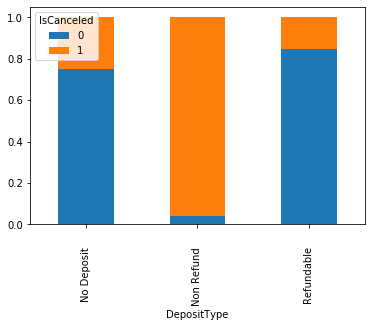

In [32]:
ct =pd.crosstab(df['DepositType'],df['IsCanceled'])
ct.div(ct.sum(1), axis=0).plot(kind='bar', stacked=True)

In [33]:
m = df['Agent'].value_counts()[(df['Agent'].value_counts()>400)].index
m

Index(['240', '       NULL', '250', '241', '40', '314', '242', '6', '96',
       '243', '298'],
      dtype='object')

In [34]:
# Filtering only 1% of values in Agent 
ct =pd.crosstab(df['Agent'],df['IsCanceled']).loc[m,:]
ct.div(ct.sum(1), axis=0).sort_values(by=1,ascending=False)

IsCanceled,0,1
96,0.545624,0.454376
240,0.605681,0.394319
242,0.666239,0.333761
298,0.699153,0.300847
250,0.821192,0.178808
314,0.824164,0.175836
NULL,0.826897,0.173103
241,0.862870,0.137130
6,0.902801,0.097199
40,0.918164,0.081836


In [35]:
df1 = df[df['AssignedRoomType'] != df['ReservedRoomType']]

In [36]:
ct =pd.crosstab(df1['ReservedRoomType'],df1['IsCanceled'])
ct.div(ct.sum(1), axis=0).sort_values(by=1,ascending=False)

IsCanceled,0,1
ReservedRoomType,,
L,0.800000,0.200000
C,0.934783,0.065217
A,0.947352,0.052648
E,0.959100,0.040900
G,0.967742,0.032258
D,0.968796,0.031204
F,0.975610,0.024390
H,1.000000,0.000000


In [37]:
ct =pd.crosstab(df['AssignedRoomType'],df['IsCanceled'])
ct.div(ct.sum(1), axis=0).sort_values(by=1,ascending=False)

IsCanceled,0,1
AssignedRoomType,,
L,0.000000,1.000000
P,0.000000,1.000000
A,0.645254,0.354746
H,0.647472,0.352528
G,0.648678,0.351322
E,0.746719,0.253281
D,0.797950,0.202050
C,0.805330,0.194670
F,0.879977,0.120023


In [38]:
ct =pd.crosstab(df['ArrivalDateMonth'],df['IsCanceled'])
ct.div(ct.sum(1), axis=0).sort_values(by=1,ascending=False)

IsCanceled,0,1
ArrivalDateMonth,,
August,0.665509,0.334491
June,0.669294,0.330706
September,0.676319,0.323681
July,0.685983,0.314017
April,0.706567,0.293433
May,0.712279,0.287721
October,0.724895,0.275105
February,0.743796,0.256204
December,0.761707,0.238293


In [39]:
m = df['Company'].value_counts()[(df['Company'].value_counts()>100)].index

In [40]:
pd.crosstab(df['Company'],df['MarketSegment']).loc[m,:]

MarketSegment,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA
NULL,177,433,6365,4847,7424,17706
223,0,0,3,779,0,2
281,2,134,2,0,0,0
154,0,130,3,0,0,0


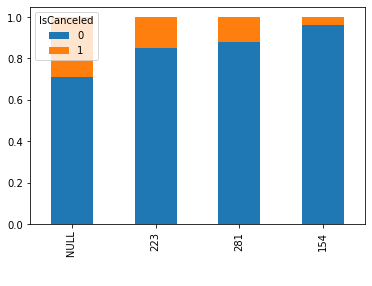

In [41]:
ct = pd.crosstab(df['Company'],df['IsCanceled']).loc[m,:]
ct.div(ct.sum(1), axis=0).sort_values(by=1,ascending=False).plot(kind='bar', stacked=True)

In [42]:
m = df['Country'].value_counts()[(df['Country'].value_counts()>400)].index
m

Index(['PRT', 'GBR', 'ESP', 'IRL', 'FRA', 'DEU', 'CN', 'NLD', 'USA', 'ITA',
       'BEL', 'CHE', 'BRA'],
      dtype='object')

In [43]:
df['Country'][df['IsCanceled']==1].value_counts()[(df['Country'].value_counts()>400)].index

Index(['PRT', 'GBR', 'ESP', 'IRL', 'FRA', 'DEU', 'CHE', 'BRA', 'CN', 'ITA',
       'USA', 'BEL', 'NLD'],
      dtype='object')

In [44]:
# Filtering 1% of values in Country
ct = pd.crosstab(df['Country'],df['IsCanceled']).loc[m,:]
ct.div(ct.sum(1), axis=0).sort_values(by=1,ascending=False)

IsCanceled,0,1
PRT,0.578106,0.421894
CHE,0.742529,0.257471
BRA,0.765116,0.234884
ESP,0.784938,0.215062
IRL,0.800554,0.199446
ITA,0.825708,0.174292
USA,0.849687,0.150313
CN,0.864789,0.135211
BEL,0.868304,0.131696
FRA,0.869025,0.130975


# 4. STATISTICAL ANALYSIS

In [98]:
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.api import anova_lm

**Categorical Vs Categorical features**

In [10]:
significant_col = []
insignificant_col = []
for i in categ_col:
    for j in categ_col:
        chisq, pval, dof, exp = stats.chi2_contingency(pd.crosstab(df[j],df[i]))
        if pval < 0.00001:
            significant_col.append((i,j))
        else:
            insignificant_col.append((i,j))
print('Significant Features:\n',significant_col)
print('\nInsignificant Features:\n',insignificant_col)

Significant Features:
 [('ArrivalDateMonth', 'ArrivalDateMonth'), ('ArrivalDateMonth', 'Meal'), ('ArrivalDateMonth', 'Country'), ('ArrivalDateMonth', 'MarketSegment'), ('ArrivalDateMonth', 'DistributionChannel'), ('ArrivalDateMonth', 'ReservedRoomType'), ('ArrivalDateMonth', 'AssignedRoomType'), ('ArrivalDateMonth', 'DepositType'), ('ArrivalDateMonth', 'Agent'), ('ArrivalDateMonth', 'Company'), ('ArrivalDateMonth', 'CustomerType'), ('ArrivalDateMonth', 'ReservationStatus'), ('ArrivalDateMonth', 'ReservationStatusDate'), ('Meal', 'ArrivalDateMonth'), ('Meal', 'Meal'), ('Meal', 'Country'), ('Meal', 'MarketSegment'), ('Meal', 'DistributionChannel'), ('Meal', 'ReservedRoomType'), ('Meal', 'AssignedRoomType'), ('Meal', 'DepositType'), ('Meal', 'Agent'), ('Meal', 'Company'), ('Meal', 'CustomerType'), ('Meal', 'ReservationStatus'), ('Meal', 'ReservationStatusDate'), ('Country', 'ArrivalDateMonth'), ('Country', 'Meal'), ('Country', 'Country'), ('Country', 'MarketSegment'), ('Country', 'Distrib

### Except for country and company, all the other categorical features are significant with each other

In [34]:
significant_col = []
insignificant_col = []
for i in categ_col:
    for j in categ_col:
        chisq, pval, dof, exp = stats.chi2_contingency(pd.crosstab(df[j],df[i]))
        print(i,j)
        print(pval)
        print('\n')

ArrivalDateMonth ArrivalDateMonth
0.0


ArrivalDateMonth Meal
0.0


ArrivalDateMonth Country
0.0


ArrivalDateMonth MarketSegment
0.0


ArrivalDateMonth DistributionChannel
0.0


ArrivalDateMonth ReservedRoomType
1.6245397617881446e-292


ArrivalDateMonth AssignedRoomType
1.086835989195793e-146


ArrivalDateMonth DepositType
0.0


ArrivalDateMonth Agent
0.0


ArrivalDateMonth Company
7.0342855387148035e-199


ArrivalDateMonth CustomerType
0.0


ArrivalDateMonth ReservationStatus
5.30362279677817e-120


ArrivalDateMonth ReservationStatusDate
0.0


Meal ArrivalDateMonth
0.0


Meal Meal
0.0


Meal Country
1.7163495937074043e-297


Meal MarketSegment
0.0


Meal DistributionChannel
6.693970363987976e-143


Meal ReservedRoomType
0.0


Meal AssignedRoomType
0.0


Meal DepositType
0.0


Meal Agent
0.0


Meal Company
8.096377766985376e-77


Meal CustomerType
0.0


Meal ReservationStatus
2.8017797556362673e-110


Meal ReservationStatusDate
0.0


Country ArrivalDateMonth
0.0


Country Meal
1.7163

**Significance of each feature with the target**

In [79]:
significant_col = []
insignificant_col = []
p_num = []
p_cat = []
for i in numeric_col:    
    formula = i+' ~ IsCanceled'
    model = ols(formula,df).fit()
    ano = anova_lm(model, typ=2)
    p_num.append(model.pvalues['IsCanceled'])
    if model.pvalues['IsCanceled']< 0.05:
        significant_col.append(i)
    else:
        insignificant_col.append(i)
for j in categ_col:
    chisq, pval, dof, exp = stats.chi2_contingency(pd.crosstab(df[j],df.IsCanceled))
    p_cat.append(pval)
    if pval < 0.05:
        significant_col.append(j)
    else:
        insignificant_col.append(j)
print('Significant Features:\n',significant_col)
print('\nInsignificant Features:\n',insignificant_col)

Significant Features:
 ['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'ArrivalDateMonth', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel', 'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'Agent', 'Company', 'CustomerType', 'ReservationStatus', 'ReservationStatusDate']

Insignificant Features:
 ['ArrivalDateDayOfMonth']


### Except for ArrivalDateDayOfMonth all other features are significant with the target

In [84]:
df_pval_num = pd.DataFrame({'Feature':numeric_col,'P value':p_num})
df_pval_num

,Feature,P value
0,IsCanceled,0.000000
1,LeadTime,0.000000
2,ArrivalDateYear,0.000000
3,ArrivalDateWeekNumber,0.000015
4,ArrivalDateDayOfMonth,0.060302
5,StaysInWeekendNights,0.000000
6,StaysInWeekNights,0.000000
7,Adults,0.000000
8,Children,0.000000
9,Babies,0.000003


In [85]:
df_pval_cat = pd.DataFrame({'Feature':categ_col,'P value':p_cat})
df_pval_cat

,Feature,P value
0,ArrivalDateMonth,0.000000
1,Meal,0.000000
2,Country,0.000000
3,MarketSegment,0.000000
4,DistributionChannel,0.000000
5,ReservedRoomType,0.000000
6,AssignedRoomType,0.000000
7,DepositType,0.000000
8,Agent,0.000000
9,Company,0.000000


# 5. FEATURE ENGINEERING

In [5]:
#Converting the ArrivalDayMonth feature into quarters
def quarter(x):
    if x in ['January','February','March',]:
        return 1
    elif x in ['April','May','June','July']:
        return 2
    elif x in ['August','September','October']:
        return 3
    else:
        return 4

In [6]:
df['Quarter'] = df['ArrivalDateMonth'].apply(quarter)

In [7]:
#Creating a new feature TotalStayInNights
df['TotalStayinNights'] = df['StaysInWeekNights']+df['StaysInWeekendNights']

In [8]:
#Creating a new feature to check if the trip is a family or business trip
#If there are no children in the trip, the trip is being considered as business trip
#Else the trip is considered to be a family trip
def adults(x):
    if x == 0:
        return 0
    else:
        return 1

In [9]:
df['Adults/Children'] = df['Children']+df['Babies']

In [10]:
df['Family/Business'] = df['Adults/Children'].apply(adults)

In [11]:
#Segregating the values in Country to three bins
#Since Portugal makes up for 44% of all values, it is taken as a separate category
#Countries that make up for 15% of cancellations are binned as 'High'
#The rest are binned as 'Low'
def country(x):
    if x == 'PRT':
        return 'Portugal'
    elif x in ['CHE','BRA','ESP','IRL','ITA','USA']:
        return 'High'
    else:
        return 'Low'

In [12]:
#Segregating the values in Agent to four bins
#Bookings done without agents are taken as a separate category
#Agents with more than 30% of cancellations are binned as 'High'
#Agents with more than 0.05% cancellations are binned as 'Low'
#The rest are binned as 'Low'
def agent(x):
    if x == 'NULL':
        return 'No Agent'
    elif x in ['96','240','242','298']:
        return 'High'
    elif x in ['250','314','241','6','40','243']: 
        return 'Medium' 
    else:
        return 'Low'

In [13]:
#Similar to country and agent, company is binned into three categories
def company(x):
    if x == '       NULL':
        return 'No Company'
    elif x in ['223','281','154']:
        return 'Significant'
    else:
        return 'Others'

In [14]:
df['Company'] = df['Company'].apply(company)

In [15]:
(df['Company'].value_counts()/df['Company'].count())*100

No Company     92.241638
Others          5.124813
Significant     2.633550
Name: Company, dtype: float64

In [16]:
df['Agent'] = df['Agent'].apply(agent)

In [17]:
(df['Agent'].value_counts()/df['Agent'].count())*100                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Low       41.754868
High      39.173739
Medium    19.071393
Name: Agent, dtype: float64

In [18]:
df['Country'] = df['Country'].apply(country)

In [19]:
(df['Country'].value_counts()/df['Country'].count())*100

Portugal    44.008987
Low         36.205691
High        19.785322
Name: Country, dtype: float64

In [20]:
#Arrival date is classified into four quarters of a month
def monthlyquarter(x):
    if x in range(1,8):
        return 1
    elif x in range(8,15):
        return 2
    elif x in range(15,22):
        return 3
    else:
        return 4

In [21]:
df['MonthlyQuarter'] = df['ArrivalDateDayOfMonth'].apply(monthlyquarter)

In [22]:
df['Country'].unique()

array(['Portugal', 'Low', 'High'], dtype=object)

In [24]:
#Creating a new feature Assigned/Reserved to capture the information if the room reserved by the customer is assigned to them by the hotel
df['Assigned/Reserved'] = df.apply(lambda row: (row.AssignedRoomType != row.ReservedRoomType), axis = 1) 

In [25]:
col = ['DistributionChannel','MarketSegment','ReservedRoomType','AssignedRoomType']
for j in col:
    chisq, pval, dof, exp = stats.chi2_contingency(pd.crosstab(df[j],df.IsCanceled))
    print(j)
    print(pval)

DistributionChannel
1.8372367058689292e-160
MarketSegment
0.0
ReservedRoomType
8.19407104648512e-54
AssignedRoomType
6.616338408053001e-284


In [26]:
df.drop(['ReservationStatus','ReservationStatusDate','MarketSegment','Adults/Children','ReservedRoomType','ArrivalDateMonth','ArrivalDateWeekNumber','StaysInWeekNights','Children'], axis = 1,inplace=True)

#### Since ReservationStatus and ReservationStatusDate are the data that would be available post the check-in/cancellation/no show, these features can be dropped.

#### Since Market Segment and Distribution Channel provide the same information, Market Segment being less significant with the target variable has been dropped

#### Since AssignedRoomType and ReservedRoomType provide the same information, ReservedRoomType being less significant with the target variable has been dropped

In [27]:
cat_cols = df.select_dtypes('object').columns.tolist()

In [28]:
df_final = df.copy()

In [29]:
df_final.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateDayOfMonth,StaysInWeekendNights,Adults,Babies,Meal,Country,DistributionChannel,...,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,Quarter,TotalStayinNights,Family/Business,MonthlyQuarter,Assigned/Reserved
0,0,342,2015,1,0,2,0,BB,Portugal,Direct,...,0,Transient,0.0,0,0,2,0,0,1,False
1,0,737,2015,1,0,2,0,BB,Portugal,Direct,...,0,Transient,0.0,0,0,2,0,0,1,False
2,0,7,2015,1,0,1,0,BB,Low,Direct,...,0,Transient,75.0,0,0,2,1,0,1,True
3,0,13,2015,1,0,1,0,BB,Low,Corporate,...,0,Transient,75.0,0,0,2,1,0,1,False
4,0,14,2015,1,0,2,0,BB,Low,TA/TO,...,0,Transient,98.0,0,1,2,2,0,1,False


In [30]:
# Creating dummy variables
for col in cat_cols:
    k=df_final[col].value_counts().index[:-1]
    for cat in k:
        name=col+'_'+cat
        df_final[name]=(df_final[col]==cat).astype(int)
    del df_final[col]
    print(col)

Meal
Country
DistributionChannel
AssignedRoomType
DepositType
Agent
Company
CustomerType


In [31]:
df_final['TotalPreviousBookings'] = df_final['PreviousBookingsNotCanceled']+df_final['PreviousCancellations']

In [32]:
#Removing outliers in the LeadTime feature
df_final[df_final['LeadTime'] > df['LeadTime'].quantile([0.99]).values[0]].shape

(399, 49)

In [33]:
df_final.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'Adults', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'Quarter',
       'TotalStayinNights', 'Family/Business', 'MonthlyQuarter',
       'Assigned/Reserved', 'Meal_BB       ', 'Meal_HB       ',
       'Meal_Undefined', 'Meal_FB       ', 'Country_Portugal', 'Country_Low',
       'DistributionChannel_TA/TO', 'DistributionChannel_Direct',
       'DistributionChannel_Corporate', 'AssignedRoomType_A               ',
       'AssignedRoomType_D               ',
       'AssignedRoomType_E               ',
       'AssignedRoomType_C               ',
       'AssignedRoomType_G               ',
       'AssignedRoomType_F               ',
       'AssignedRoomType_H               ',
       'AssignedRoomType_I               ',
       

In [34]:
df_final.shape

(40060, 49)

In [35]:
from scipy.stats import zscore

In [36]:
#Scaling the data
X = df_final.drop('IsCanceled',axis=1)
y = df_final['IsCanceled']
X_scaled = X.apply(zscore)


In [37]:
#Train Test Split - 70:30
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=5)

## Model Building

**Logistic Regression**

In [37]:
logreg = LogisticRegression()

In [38]:
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

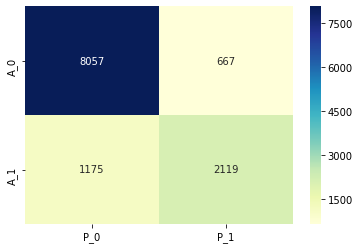

In [39]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_0','P_1'],index=['A_0','A_1'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [337]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      8724
           1       0.76      0.64      0.70      3294

    accuracy                           0.85     12018
   macro avg       0.82      0.78      0.80     12018
weighted avg       0.84      0.85      0.84     12018



In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc

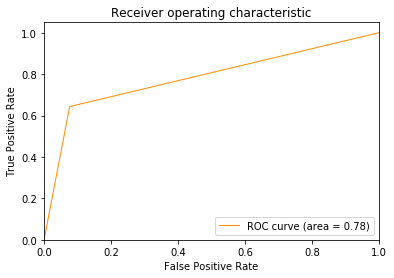

In [41]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [42]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','f1-score','Accuracy Score','Train Accuracy']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
Logistic_regression_metrics = pd.Series({'Model': "Logistic regression ",
                     'AUC Score' : roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, y_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, y_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Train Accuracy': logreg.score(X_train,y_train)})



# appending our result table
result_tabulation = result_tabulation.append(Logistic_regression_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.783418,0.841990,0.846730,0.842495,0.846730,0.851116


#### Decision Tree

In [43]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
decision_tree_classification = DecisionTreeClassifier(criterion='entropy')

# train model
decision_tree = decision_tree_classification.fit(X_train, y_train)

# predict the model using 'X_test'
decision_tree_pred = decision_tree.predict(X_test)

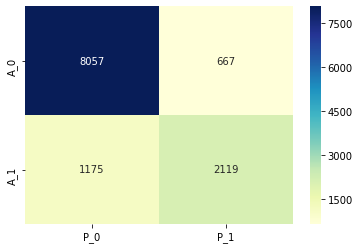

In [44]:
# compute the confusion matrix
cm = confusion_matrix(y_test, decision_tree_pred)


# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [344]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,decision_tree_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      8724
           1       0.77      0.79      0.78      3294

    accuracy                           0.88     12018
   macro avg       0.85      0.85      0.85     12018
weighted avg       0.88      0.88      0.88     12018



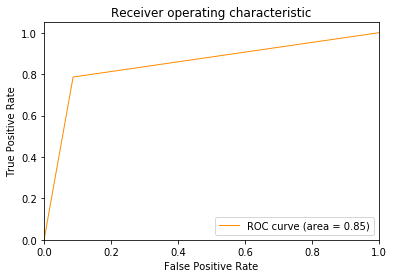

In [345]:
fpr, tpr, thresholds = roc_curve(y_test,decision_tree_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [45]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Decision_Tree_metrics = pd.Series({'Model': "Decision Tree",
                     'AUC Score' : roc_auc_score(y_test, decision_tree_pred),
                 'Precision Score': metrics.precision_score(y_test, decision_tree_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, decision_tree_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, decision_tree_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, decision_tree_pred),
                 'Train Accuracy': decision_tree.score(X_train,y_train)})



# appending our result table
result_tabulation = result_tabulation.append(Decision_Tree_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.783418,0.841990,0.846730,0.842495,0.846730,0.851116
1,Decision Tree,0.849796,0.879582,0.879181,0.879373,0.879181,0.997825


**Decision Tree using Grid Search CV**

In [347]:
# 'criterion': The function to measure the quality of split
# 'max_depth': The maximum depth of the tree
# 'max_leaf_nodes': The maximum number of leaf nodes required
# 'min_samples_leaf': The minimum number of samples required to be at a leaf node
# 'min_samples_split': The minimum number of samples required to split an internal node

max_depth = np.arange(1,5,1)
min_samples_leaf = np.arange(1,50,10)
max_leaf_nodes = np.arange(10,20,1)

# set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": max_depth,
              "min_samples_leaf":min_samples_leaf
              }

In [348]:
decision_tree_Gridsearch = DecisionTreeClassifier()
decision_tree_Gridsearch = GridSearchCV(decision_tree_Gridsearch, param_grid, cv=10)
decision_tree_Gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4]),
                 

In [349]:
decision_tree_Gridsearch.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1}

In [46]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
decision_tree_classification = DecisionTreeClassifier(criterion='entropy',
 max_depth=4,
 max_leaf_nodes=4,
 min_samples_leaf=1)

# train model
decision_tree_Grid = decision_tree_classification.fit(X_train, y_train)

# predict the model using 'X_test'
decision_tree_Grid_pred = decision_tree_Grid.predict(X_test)

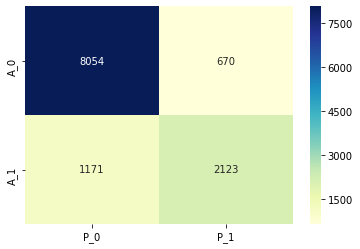

In [351]:
# compute the confusion matrix
cm = confusion_matrix(y_test, decision_tree_Grid_pred)

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [47]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,decision_tree_Grid_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      8724
           1       0.96      0.15      0.26      3294

    accuracy                           0.77     12018
   macro avg       0.86      0.57      0.56     12018
weighted avg       0.81      0.77      0.70     12018



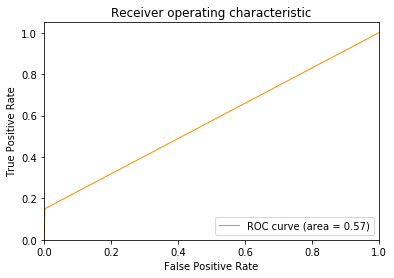

In [48]:
fpr, tpr, thresholds = roc_curve(y_test,decision_tree_Grid_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [49]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Decision_Tree_Grid_metrics = pd.Series({'Model': "Decision Tree with Grid Search",
                     'AUC Score' : roc_auc_score(y_test, decision_tree_Grid_pred),
                 'Precision Score': metrics.precision_score(y_test, decision_tree_Grid_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, decision_tree_Grid_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, decision_tree_Grid_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, decision_tree_Grid_pred),
                 'Train Accuracy': decision_tree_Grid.score(X_train,y_train)})



# appending our result table
result_tabulation = result_tabulation.append(Decision_Tree_Grid_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.783418,0.841990,0.846730,0.842495,0.846730,0.851116
1,Decision Tree,0.849796,0.879582,0.879181,0.879373,0.879181,0.997825
2,Decision Tree with Grid Search,0.573876,0.811672,0.765269,0.695862,0.765269,0.760359


**Random Forest Classifier**

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

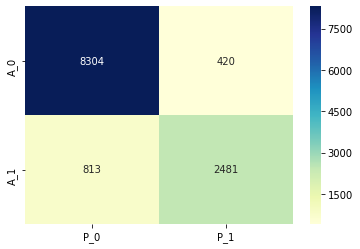

In [52]:
# compute the confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_0','P_1'],index=['A_0','A_1'])

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [358]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,rf_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      8724
           1       0.85      0.77      0.81      3294

    accuracy                           0.90     12018
   macro avg       0.88      0.86      0.87     12018
weighted avg       0.90      0.90      0.90     12018



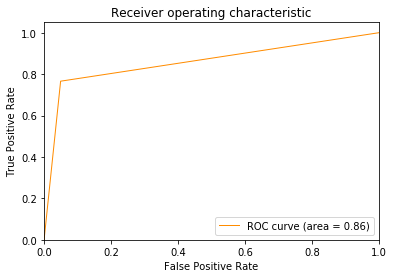

In [359]:
fpr, tpr, thresholds = roc_curve(y_test,rf_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [53]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Random_forest_metrics = pd.Series({'Model': "Random Forest",
                     'AUC Score' : roc_auc_score(y_test, rf_pred),
                 'Precision Score': metrics.precision_score(y_test, rf_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, rf_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, rf_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, rf_pred),
                 'Train Accuracy': rf.score(X_train,y_train)})



# appending our result table
result_tabulation = result_tabulation.append(Random_forest_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.783418,0.841990,0.846730,0.842495,0.846730,0.851116
1,Decision Tree,0.849796,0.879582,0.879181,0.879373,0.879181,0.997825
2,Decision Tree with Grid Search,0.573876,0.811672,0.765269,0.695862,0.765269,0.760359
3,Random Forest,0.852522,0.895586,0.897404,0.895280,0.897404,0.990051


**Feature Selection**

Text(0.5, 1.0, 'Visualizing Important Features')

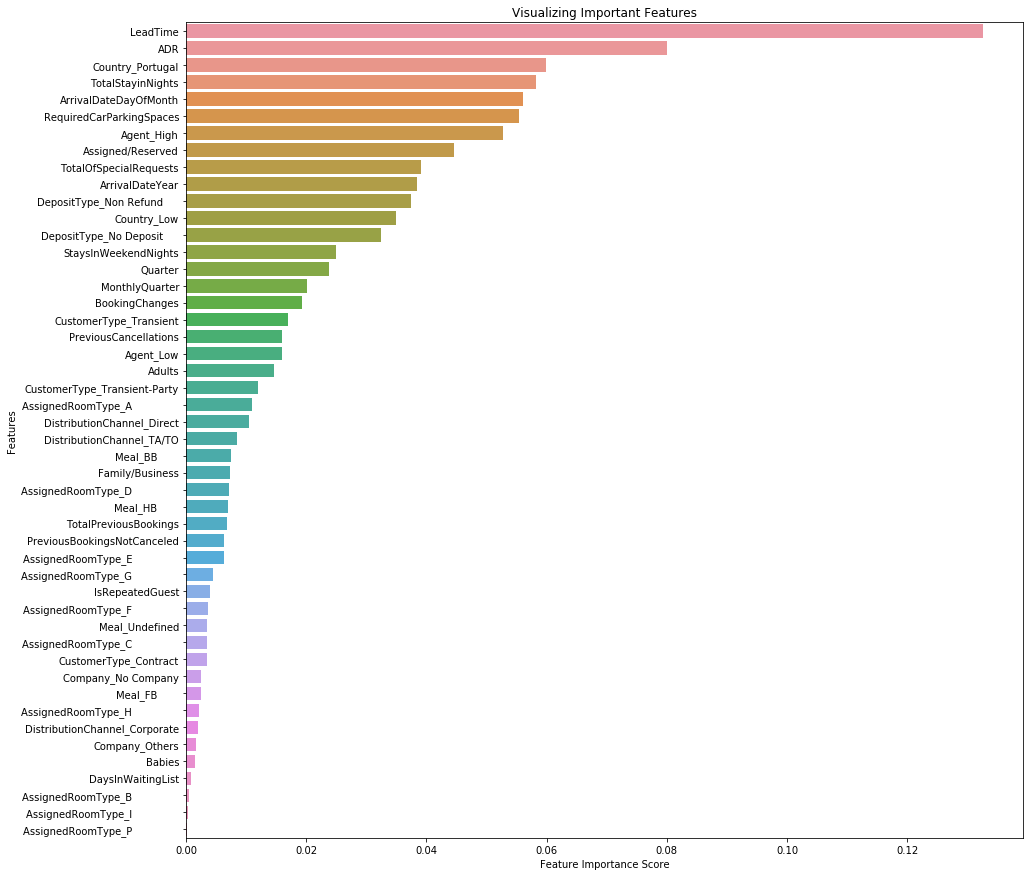

In [54]:
feature_imp = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

In [83]:
rf_f = feature_imp[feature_imp>0.00730].index.tolist()
rf_f

['LeadTime',
 'ADR',
 'Country_Portugal',
 'TotalStayinNights',
 'ArrivalDateDayOfMonth',
 'RequiredCarParkingSpaces',
 'Agent_High',
 'Assigned/Reserved',
 'TotalOfSpecialRequests',
 'ArrivalDateYear',
 'DepositType_Non Refund     ',
 'Country_Low',
 'DepositType_No Deposit     ',
 'StaysInWeekendNights',
 'Quarter',
 'MonthlyQuarter',
 'BookingChanges',
 'CustomerType_Transient',
 'PreviousCancellations',
 'Agent_Low',
 'Adults',
 'CustomerType_Transient-Party',
 'AssignedRoomType_A               ',
 'DistributionChannel_Direct',
 'DistributionChannel_TA/TO',
 'Meal_BB       ']

In [84]:
len(rf_f)

26

In [363]:
#no of features
nof_list=np.arange(1,50)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = RandomForestClassifier()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 26
Score with 26 features: 0.905475


In [41]:
model = RandomForestClassifier()
rfe = RFE(model, 26)
X_rfe = rfe.fit_transform(X,y)  
model.fit(X_rfe,y)
print(rfe.support_)


[ True  True  True  True  True False False  True False  True False  True
  True  True  True  True False  True  True False  True False False  True
  True False  True False  True  True False False False False False False
 False False  True  True  True  True False False  True  True False False]


In [42]:
a = rfe.support_
b = df_final.columns
b = b[1:]
c = []
for i in range(48):
    if a[i]==True:
        c.append(b[i])

In [62]:
len(c)

26

In [43]:
c

['LeadTime',
 'ArrivalDateYear',
 'ArrivalDateDayOfMonth',
 'StaysInWeekendNights',
 'Adults',
 'PreviousCancellations',
 'BookingChanges',
 'ADR',
 'RequiredCarParkingSpaces',
 'TotalOfSpecialRequests',
 'Quarter',
 'TotalStayinNights',
 'MonthlyQuarter',
 'Assigned/Reserved',
 'Meal_HB       ',
 'Country_Portugal',
 'Country_Low',
 'DistributionChannel_Direct',
 'AssignedRoomType_A               ',
 'AssignedRoomType_D               ',
 'DepositType_No Deposit     ',
 'DepositType_Non Refund     ',
 'Agent_Low',
 'Agent_High',
 'CustomerType_Transient',
 'CustomerType_Transient-Party']

In [85]:
d = {'Random Forest': sorted(rf_f), 'RFE': sorted(c)}
feat_sel = pd.DataFrame(d)
feat_sel

,Random Forest,RFE
0,ADR,ADR
1,Adults,Adults
2,Agent_High,Agent_High
3,Agent_Low,Agent_Low
4,ArrivalDateDayOfMonth,ArrivalDateDayOfMonth
5,ArrivalDateYear,ArrivalDateYear
6,Assigned/Reserved,Assigned/Reserved
7,AssignedRoomType_A,AssignedRoomType_A
8,BookingChanges,AssignedRoomType_D
9,Country_Low,BookingChanges


In [44]:
df_final.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'Adults', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'Quarter',
       'TotalStayinNights', 'Family/Business', 'MonthlyQuarter',
       'Assigned/Reserved', 'Meal_BB       ', 'Meal_HB       ',
       'Meal_Undefined', 'Meal_FB       ', 'Country_Portugal', 'Country_Low',
       'DistributionChannel_TA/TO', 'DistributionChannel_Direct',
       'DistributionChannel_Corporate', 'AssignedRoomType_A               ',
       'AssignedRoomType_D               ',
       'AssignedRoomType_E               ',
       'AssignedRoomType_C               ',
       'AssignedRoomType_G               ',
       'AssignedRoomType_F               ',
       'AssignedRoomType_H               ',
       'AssignedRoomType_I               ',
       

In [45]:
df_final.shape

(40060, 49)

In [46]:
df['Meal'].value_counts()

BB           30005
HB            8046
Undefined     1169
FB             754
SC              86
Name: Meal, dtype: int64

In [47]:
#Selecting top 27 significant features
df_feat = df_final[c]
df_feat['Meal_HB'] = df_final['Meal_HB       ']
df_feat.shape

(40060, 27)

In [48]:
df_feat.columns

Index(['LeadTime', 'ArrivalDateYear', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'Adults', 'PreviousCancellations',
       'BookingChanges', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'Quarter', 'TotalStayinNights',
       'MonthlyQuarter', 'Assigned/Reserved', 'Meal_HB       ',
       'Country_Portugal', 'Country_Low', 'DistributionChannel_Direct',
       'AssignedRoomType_A               ',
       'AssignedRoomType_D               ', 'DepositType_No Deposit     ',
       'DepositType_Non Refund     ', 'Agent_Low', 'Agent_High',
       'CustomerType_Transient', 'CustomerType_Transient-Party', 'Meal_HB'],
      dtype='object')

In [49]:
#Scaling
X = df_feat
y = df_final['IsCanceled']
X_scaled = X.apply(zscore)

In [50]:
#Train Test split - 70:30
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=5)

### Model Building

**Logistic Regression**

In [51]:
logreg = LogisticRegression()

In [52]:
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

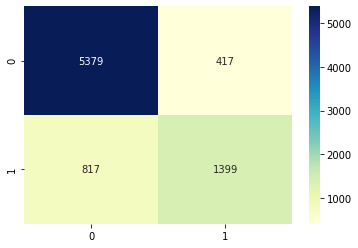

In [98]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [99]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5796
           1       0.77      0.63      0.69      2216

    accuracy                           0.85      8012
   macro avg       0.82      0.78      0.80      8012
weighted avg       0.84      0.85      0.84      8012



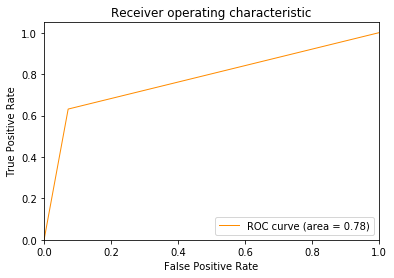

In [100]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [55]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','f1-score','Accuracy Score','Train Accuracy']

# creating an empty dataframe of the colums
result_tabulation1 = pd.DataFrame(columns = cols)

# compiling the required information
Logistic_regression_metrics = pd.Series({'Model': "Logistic regression with feature selection",
                     'AUC Score' : roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, y_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, y_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Train Accuracy': logreg.score(X_train,y_train)})

# appending our result table
result_tabulation1 = result_tabulation1.append(Logistic_regression_metrics , ignore_index = True)

# view the result table
result_tabulation1

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression with feature selection,0.778836,0.840425,0.845357,0.84025,0.845357,0.845045


**Descision Tree**

In [56]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
decision_tree_classification = DecisionTreeClassifier(criterion='entropy')

# train model
decision_tree = decision_tree_classification.fit(X_train, y_train)

# predict the model using 'X_test'
decision_tree_pred = decision_tree.predict(X_test)

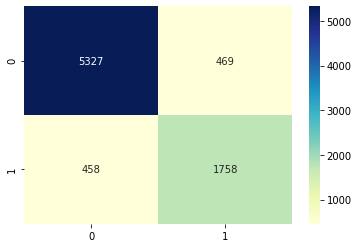

In [103]:
# compute the confusion matrix
cm = confusion_matrix(y_test, decision_tree_pred)

# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [104]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,decision_tree_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5796
           1       0.79      0.79      0.79      2216

    accuracy                           0.88      8012
   macro avg       0.86      0.86      0.86      8012
weighted avg       0.88      0.88      0.88      8012



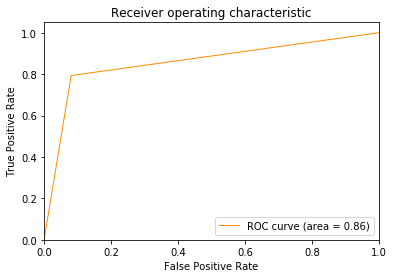

In [105]:
fpr, tpr, thresholds = roc_curve(y_test,decision_tree_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [57]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Decision_Tree_metrics = pd.Series({'Model': "Decision Tree with feature selection",
                     'AUC Score' : roc_auc_score(y_test, decision_tree_pred),
                 'Precision Score': metrics.precision_score(y_test, decision_tree_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, decision_tree_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, decision_tree_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, decision_tree_pred),
                 'Train Accuracy': decision_tree.score(X_train,y_train)})



# appending our result table
result_tabulation1 = result_tabulation1.append(Decision_Tree_metrics , ignore_index = True)

# view the result table
result_tabulation1

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression with feature selection,0.778836,0.840425,0.845357,0.840250,0.845357,0.845045
1,Decision Tree with feature selection,0.853176,0.883251,0.883550,0.883394,0.883550,0.997441


**Decision Tree using Grid Search CV**

In [396]:
# 'criterion': The function to measure the quality of split
# 'max_depth': The maximum depth of the tree
# 'max_leaf_nodes': The maximum number of leaf nodes required
# 'min_samples_leaf': The minimum number of samples required to be at a leaf node
# 'min_samples_split': The minimum number of samples required to split an internal node

max_depth = np.arange(1,5,1)
min_samples_leaf = np.arange(1,50,10)
max_leaf_nodes = np.arange(10,20,1)

# set of parameters to test
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": max_depth,
              "min_samples_leaf":min_samples_leaf,
              "max_leaf_nodes": max_leaf_nodes}

In [397]:
decision_tree_Gridsearch = DecisionTreeClassifier()
decision_tree_Gridsearch = GridSearchCV(decision_tree_Gridsearch, param_grid, cv=10)
decision_tree_Gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4]),
                 

In [398]:
decision_tree_Gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 1}

In [58]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
decision_tree_classification = DecisionTreeClassifier(criterion='entropy',
 max_depth=4,
 max_leaf_nodes=10,
 min_samples_leaf=1)

# train model
decision_tree_Grid = decision_tree_classification.fit(X_train, y_train)

# predict the model using 'X_test'
decision_tree_Grid_pred = decision_tree_Grid.predict(X_test)

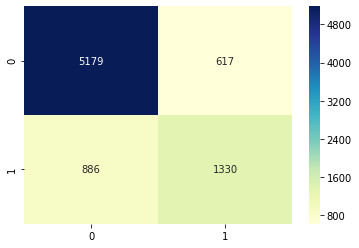

In [535]:
# compute the confusion matrix
cm = confusion_matrix(y_test, decision_tree_Grid_pred)


# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [536]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,decision_tree_Grid_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      5796
           1       0.68      0.60      0.64      2216

    accuracy                           0.81      8012
   macro avg       0.77      0.75      0.76      8012
weighted avg       0.81      0.81      0.81      8012



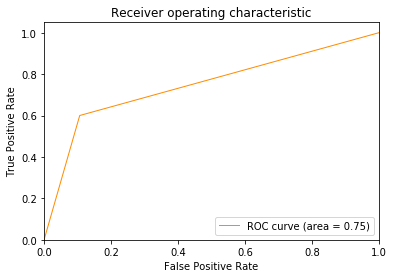

In [537]:
fpr, tpr, thresholds = roc_curve(y_test,decision_tree_Grid_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [59]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Decision_Tree_Grid_metrics = pd.Series({'Model': "Decision Tree with grid search",
                     'AUC Score' : roc_auc_score(y_test, decision_tree_Grid_pred),
                 'Precision Score': metrics.precision_score(y_test, decision_tree_Grid_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, decision_tree_Grid_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, decision_tree_Grid_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, decision_tree_Grid_pred),
                 'Train Accuracy': decision_tree_Grid.score(X_train,y_train)})



# appending our result table
result_tabulation1 = result_tabulation1.append(Decision_Tree_Grid_metrics , ignore_index = True)

# view the result table
result_tabulation1

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression with feature selection,0.778836,0.840425,0.845357,0.840250,0.845357,0.845045
1,Decision Tree with feature selection,0.853176,0.883251,0.883550,0.883394,0.883550,0.997441
2,Decision Tree with grid search,0.746864,0.806671,0.812406,0.808473,0.812406,0.812812


**Random Forest**

In [60]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
random_forest = RandomForestClassifier()

# train model
random_forest.fit(X_train, y_train)

# predict the model using 'X_test'
rf_pred = random_forest.predict(X_test)

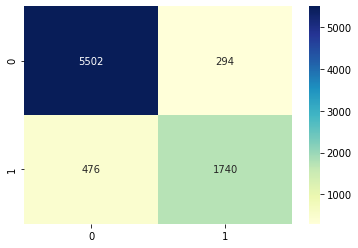

In [540]:
# compute the confusion matrix
cm = confusion_matrix(y_test, rf_pred)



# set size of the plot
#plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [541]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,rf_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      5796
           1       0.86      0.79      0.82      2216

    accuracy                           0.90      8012
   macro avg       0.89      0.87      0.88      8012
weighted avg       0.90      0.90      0.90      8012



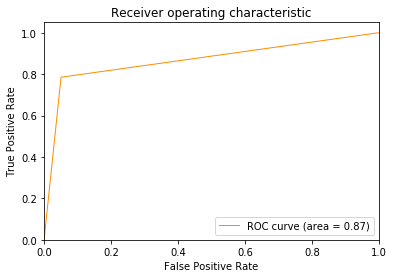

In [542]:
fpr, tpr, thresholds = roc_curve(y_test,rf_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [61]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
rf_metrics = pd.Series({'Model': "Random Forest with selected features",
                     'AUC Score' : roc_auc_score(y_test, rf_pred),
                 'Precision Score': metrics.precision_score(y_test, rf_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, rf_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, rf_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, rf_pred),
                 'Train Accuracy': random_forest.score(X_train,y_train)})

# appending our result table
result_tabulation1 = result_tabulation1.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation1

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression with feature selection,0.778836,0.840425,0.845357,0.840250,0.845357,0.845045
1,Decision Tree with feature selection,0.853176,0.883251,0.883550,0.883394,0.883550,0.997441
2,Decision Tree with grid search,0.746864,0.806671,0.812406,0.808473,0.812406,0.812812
3,Random Forest with selected features,0.863003,0.899810,0.901398,0.899920,0.901398,0.990764


**Random Forest with grid search**

In [411]:
max_depth = np.arange(1,5,1)
min_samples_leaf = np.arange(1,50,10)
max_leaf_nodes = np.arange(10,18,1)
n_estima = np.arange(100,200,25)

param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": max_depth,
              "min_samples_leaf":min_samples_leaf,
              "max_leaf_nodes": max_leaf_nodes,
              "n_estimators":n_estima}

In [412]:
random_forest_Gridsearch = RandomForestClassifier()
random_forest_Gridsearch = GridSearchCV(random_forest_Gridsearch, param_grid, cv=5)
random_forest_Gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [413]:
random_forest_Gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 16,
 'min_samples_leaf': 11,
 'n_estimators': 125}

In [62]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
random_forest = RandomForestClassifier(criterion= 'gini',
                                       max_depth=4,max_leaf_nodes=16,min_samples_leaf=11,n_estimators=125)

# train model
random_forest.fit(X_train, y_train)

# predict the model using 'X_test'
rf_pred = random_forest.predict(X_test)

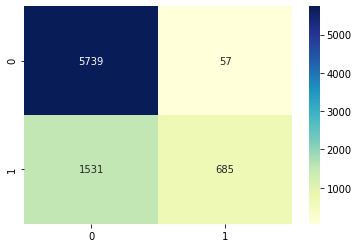

In [544]:
# compute the confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# plot a heatmap
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [545]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,rf_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      5796
           1       0.92      0.31      0.46      2216

    accuracy                           0.80      8012
   macro avg       0.86      0.65      0.67      8012
weighted avg       0.83      0.80      0.76      8012



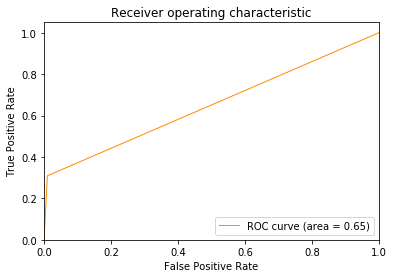

In [546]:
fpr, tpr, thresholds = roc_curve(y_test,rf_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [63]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
rf_metrics = pd.Series({'Model': "Random Forest with selected features and Grid Search",
                     'AUC Score' : roc_auc_score(y_test, rf_pred),
                 'Precision Score': metrics.precision_score(y_test, rf_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, rf_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, rf_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, rf_pred),
                 'Train Accuracy': random_forest.score(X_train,y_train)})

# appending our result table
result_tabulation1 = result_tabulation1.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation1

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression with feature selection,0.778836,0.840425,0.845357,0.840250,0.845357,0.845045
1,Decision Tree with feature selection,0.853176,0.883251,0.883550,0.883394,0.883550,0.997441
2,Decision Tree with grid search,0.746864,0.806671,0.812406,0.808473,0.812406,0.812812
3,Random Forest with selected features,0.863003,0.899810,0.901398,0.899920,0.901398,0.990764
4,Random Forest with selected features and Grid ...,0.633933,0.819147,0.793185,0.750007,0.793185,0.795931


**Ada Boost**

In [64]:
from sklearn.ensemble import AdaBoostClassifier

In [65]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
adaboost = AdaBoostClassifier()

# train model
adaboost.fit(X_train, y_train)

# predict the model using 'X_test'
ada_pred = adaboost.predict(X_test)

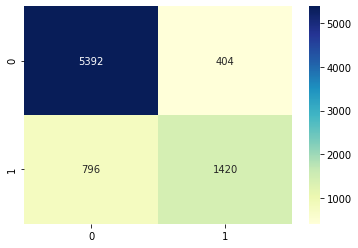

In [548]:
# compute the confusion matrix
cm = confusion_matrix(y_test, ada_pred)

# plot a heatmap
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [549]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,ada_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5796
           1       0.78      0.64      0.70      2216

    accuracy                           0.85      8012
   macro avg       0.82      0.79      0.80      8012
weighted avg       0.85      0.85      0.85      8012



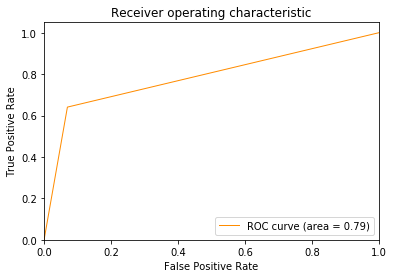

In [550]:
fpr, tpr, thresholds = roc_curve(y_test,ada_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [66]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
rf_metrics = pd.Series({'Model': "Ada Boost with selected features",
                     'AUC Score' : roc_auc_score(y_test, ada_pred),
                 'Precision Score': metrics.precision_score(y_test, ada_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, ada_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, ada_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, ada_pred),
                 'Train Accuracy': adaboost.score(X_train,y_train)})

# appending our result table
result_tabulation1 = result_tabulation1.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation1

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression with feature selection,0.778836,0.840425,0.845357,0.840250,0.845357,0.845045
1,Decision Tree with feature selection,0.853176,0.883251,0.883550,0.883394,0.883550,0.997441
2,Decision Tree with grid search,0.746864,0.806671,0.812406,0.808473,0.812406,0.812812
3,Random Forest with selected features,0.863003,0.899810,0.901398,0.899920,0.901398,0.990764
4,Random Forest with selected features and Grid ...,0.633933,0.819147,0.793185,0.750007,0.793185,0.795931
5,Ada Boost with selected features,0.789852,0.847868,0.852222,0.847832,0.852222,0.859554


**XG Boost**

In [67]:
from xgboost import XGBClassifier

In [68]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
xgboost = XGBClassifier()

# train model
xgboost.fit(X_train, y_train)

# predict the model using 'X_test'
xg_pred = xgboost.predict(X_test)

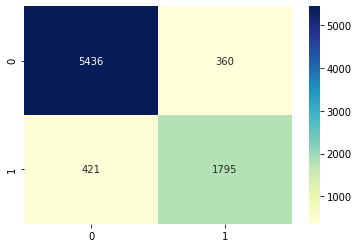

In [553]:
# compute the confusion matrix
cm = confusion_matrix(y_test, xg_pred)

# plot a heatmap
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [554]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,xg_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      5796
           1       0.83      0.81      0.82      2216

    accuracy                           0.90      8012
   macro avg       0.88      0.87      0.88      8012
weighted avg       0.90      0.90      0.90      8012



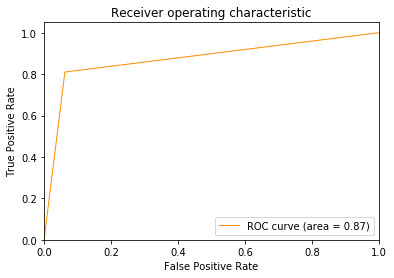

In [555]:
fpr, tpr, thresholds = roc_curve(y_test,xg_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [69]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
rf_metrics = pd.Series({'Model': "XG Boost with selected features",
                     'AUC Score' : roc_auc_score(y_test, xg_pred),
                 'Precision Score': metrics.precision_score(y_test, xg_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, xg_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, xg_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, xg_pred),
                 'Train Accuracy': xgboost.score(X_train,y_train)})

# appending our result table
result_tabulation1 = result_tabulation1.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation1

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression with feature selection,0.778836,0.840425,0.845357,0.840250,0.845357,0.845045
1,Decision Tree with feature selection,0.853176,0.883251,0.883550,0.883394,0.883550,0.997441
2,Decision Tree with grid search,0.746864,0.806671,0.812406,0.808473,0.812406,0.812812
3,Random Forest with selected features,0.863003,0.899810,0.901398,0.899920,0.901398,0.990764
4,Random Forest with selected features and Grid ...,0.633933,0.819147,0.793185,0.750007,0.793185,0.795931
5,Ada Boost with selected features,0.789852,0.847868,0.852222,0.847832,0.852222,0.859554
6,XG Boost with selected features,0.875499,0.902540,0.903145,0.902801,0.903145,0.935409


**XGBoost with Grid Search**

In [432]:
max_depth = [3,5,7,9,10]
n_estima = np.arange(1,100,20)
learn = [0.05,0.1,0.15,0.2,0.25,0.3]
colsample = [0.3,0.4,0.5,0.7]

param_grid =  {"max_depth": max_depth,
              "n_estimators":n_estima,
              'learning_rate':learn,
              'colsample_bytree':colsample}

In [433]:
xgboost_Gridsearch = XGBClassifier()
xgboost_Gridsearch = GridSearchCV(xgboost_Gridsearch, param_grid, cv=5)
xgboost_Gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrai...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='warn', n_jobs=None,
             para

In [434]:
xgboost_Gridsearch.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.2,
 'max_depth': 10,
 'n_estimators': 81}

In [70]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
xgboost = XGBClassifier(colsample_bytree= 0.5,
 learning_rate=0.2,
 max_depth=10,
 n_estimators=81)

# train model
xgboost.fit(X_train, y_train)

# predict the model using 'X_test'
xg_pred = xgboost.predict(X_test)

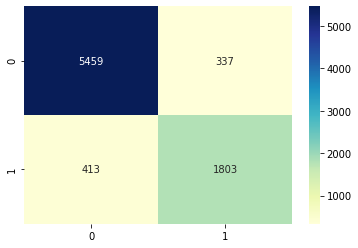

In [558]:
# compute the confusion matrix
cm = confusion_matrix(y_test, xg_pred)

# plot a heatmap
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [559]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,xg_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5796
           1       0.84      0.81      0.83      2216

    accuracy                           0.91      8012
   macro avg       0.89      0.88      0.88      8012
weighted avg       0.91      0.91      0.91      8012



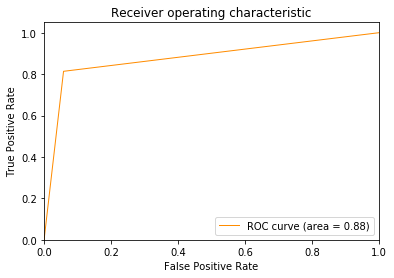

In [560]:
fpr, tpr, thresholds = roc_curve(y_test,xg_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [71]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
rf_metrics = pd.Series({'Model': "XG Boost with selected features and Grid Search",
                     'AUC Score' : roc_auc_score(y_test, xg_pred),
                 'Precision Score': metrics.precision_score(y_test, xg_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, xg_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, xg_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, xg_pred),
                 'Train Accuracy': xgboost.score(X_train,y_train)})

# appending our result table
result_tabulation1 = result_tabulation1.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation1

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression with feature selection,0.778836,0.840425,0.845357,0.840250,0.845357,0.845045
1,Decision Tree with feature selection,0.853176,0.883251,0.883550,0.883394,0.883550,0.997441
2,Decision Tree with grid search,0.746864,0.806671,0.812406,0.808473,0.812406,0.812812
3,Random Forest with selected features,0.863003,0.899810,0.901398,0.899920,0.901398,0.990764
4,Random Forest with selected features and Grid ...,0.633933,0.819147,0.793185,0.750007,0.793185,0.795931
5,Ada Boost with selected features,0.789852,0.847868,0.852222,0.847832,0.852222,0.859554
6,XG Boost with selected features,0.875499,0.902540,0.903145,0.902801,0.903145,0.935409
7,XG Boost with selected features and Grid Search,0.878917,0.906997,0.907888,0.907316,0.907888,0.969951


**LGBoost**

In [72]:
import lightgbm as lgb

In [73]:
d_train = lgb.Dataset(X_train, label=y_train)

In [74]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

In [75]:
X_train.shape

(32048, 27)

In [76]:
lg_pred=clf.predict(X_test)
#convert into binary values
for i in range(0,len(lg_pred)):
    if lg_pred[i]>=.5:
        lg_pred[i]=1
    else:  
        lg_pred[i]=0

In [77]:
lg_pred

array([0., 0., 0., ..., 0., 0., 0.])

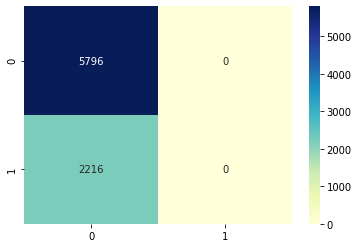

In [567]:
# compute the confusion matrix
cm = confusion_matrix(y_test, lg_pred)

# plot a heatmap
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [568]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,lg_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      5796
           1       0.00      0.00      0.00      2216

    accuracy                           0.72      8012
   macro avg       0.36      0.50      0.42      8012
weighted avg       0.52      0.72      0.61      8012



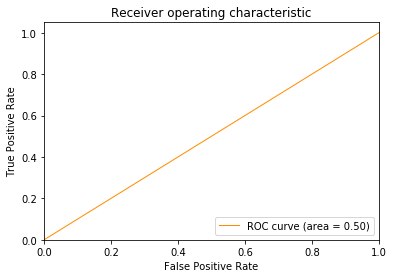

In [569]:
fpr, tpr, thresholds = roc_curve(y_test,lg_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [78]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
rf_metrics = pd.Series({'Model': "LG Boost with selected features and Grid Search",
                     'AUC Score' : roc_auc_score(y_test, lg_pred),
                 'Precision Score': metrics.precision_score(y_test, lg_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, lg_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, lg_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, lg_pred),
                 'Train Accuracy': 'NA'})

# appending our result table
result_tabulation1 = result_tabulation1.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation1

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression with feature selection,0.778836,0.840425,0.845357,0.840250,0.845357,0.845045
1,Decision Tree with feature selection,0.853176,0.883251,0.883550,0.883394,0.883550,0.997441
2,Decision Tree with grid search,0.746864,0.806671,0.812406,0.808473,0.812406,0.812812
3,Random Forest with selected features,0.863003,0.899810,0.901398,0.899920,0.901398,0.990764
4,Random Forest with selected features and Grid ...,0.633933,0.819147,0.793185,0.750007,0.793185,0.795931
5,Ada Boost with selected features,0.789852,0.847868,0.852222,0.847832,0.852222,0.859554
6,XG Boost with selected features,0.875499,0.902540,0.903145,0.902801,0.903145,0.935409
7,XG Boost with selected features and Grid Search,0.878917,0.906997,0.907888,0.907316,0.907888,0.969951
8,LG Boost with selected features and Grid Search,0.500000,0.523329,0.723415,0.607316,0.723415,NA


**Stacking**

In [79]:
from vecstack import stacking

In [80]:
model = [AdaBoostClassifier(),
        LogisticRegression(),
         XGBClassifier()]

In [81]:
S_train, S_test = stacking(model,
                           X_train, y_train, X_test,
                           
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,
                           
                           random_state=10)

In [82]:
model=XGBClassifier()
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)

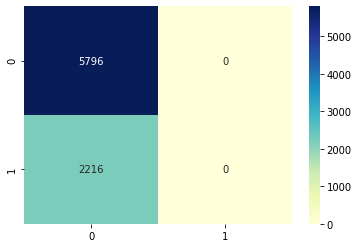

In [575]:
# compute the confusion matrix
cm = confusion_matrix(y_test, lg_pred)

# plot a heatmap
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

In [576]:
# accuracy measures obtained by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5796
           1       0.85      0.79      0.82      2216

    accuracy                           0.90      8012
   macro avg       0.88      0.87      0.88      8012
weighted avg       0.90      0.90      0.90      8012



In [83]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
rf_metrics = pd.Series({'Model': "Stacked Final Model",
                     'AUC Score' : roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, y_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, y_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Train Accuracy': model.score(S_train,y_train)})

# appending our result table
result_tabulation1 = result_tabulation1.append(rf_metrics , ignore_index = True)

# view the result table
result_tabulation1

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression with feature selection,0.778836,0.840425,0.845357,0.840250,0.845357,0.845045
1,Decision Tree with feature selection,0.853176,0.883251,0.883550,0.883394,0.883550,0.997441
2,Decision Tree with grid search,0.746864,0.806671,0.812406,0.808473,0.812406,0.812812
3,Random Forest with selected features,0.863003,0.899810,0.901398,0.899920,0.901398,0.990764
4,Random Forest with selected features and Grid ...,0.633933,0.819147,0.793185,0.750007,0.793185,0.795931
5,Ada Boost with selected features,0.789852,0.847868,0.852222,0.847832,0.852222,0.859554
6,XG Boost with selected features,0.875499,0.902540,0.903145,0.902801,0.903145,0.935409
7,XG Boost with selected features and Grid Search,0.878917,0.906997,0.907888,0.907316,0.907888,0.969951
8,LG Boost with selected features and Grid Search,0.500000,0.523329,0.723415,0.607316,0.723415,NA
9,Stacked Final Model,0.867264,0.901096,0.902521,0.901383,0.902521,0.899838


### Since stacking has a high f1-score of 90% and the train/test accuracy being close to each other, stacking is selected as the final model.